# 1 奇异值分解

In [ ]:
import numpy as np

M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0  # log(0) = 0
    if positive:
        M[M < 0] = 0.0
    return M

M_pmi = pmi(M)

np.set_printoptions(precision=2)
print(M_pmi)

[[0.   0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.22]
 [0.18 0.   0.44 0.44 0.44 0.   0.   0.   0.66 0.18]
 [0.07 0.44 0.   1.03 1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 0.   1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 1.03 0.   0.   0.   0.   0.   0.07]
 [0.3  0.   0.   0.   0.   0.   1.48 0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   1.48 0.   0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   0.78 0.78 0.   0.78 0.3 ]
 [0.3  0.66 0.   0.   0.   0.   0.   0.78 0.   0.3 ]
 [0.22 0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.  ]]


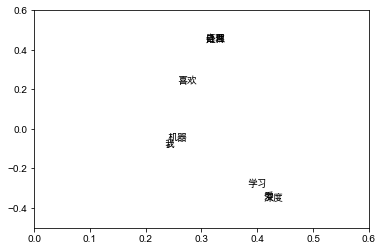

In [ ]:
U, s, Vh = np.linalg.svd(M_pmi)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

words = ["我", "喜欢", "自然", "语言", "处理", "爱", "深度", "学习", "机器", "。"]

for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])
plt.xlim(0, 0.6)
plt.ylim(-0.5, 0.6)
plt.savefig('svd.pdf')
plt.show()

# 2 前向最大匹配算法

In [ ]:
def load_dict():
    f = open("lexicon.txt")
    lexicon = set()
    max_len = 0
    for line in f:
        word = line.strip()
        lexicon.add(word)
        if len(word) > max_len:
            max_len = len(word)
    f.close()

    return lexicon, max_len

def fmm_word_seg(sentence, lexicon, max_len):
    begin = 0
    end = min(len(sentence), begin + max_len)
    words = []
    while begin < end:
        word = sentence[begin: end]
        if word in lexicon or end - begin == 1:
            words.append(word)
            begin = end
            end = min(len(sentence), begin + max_len)
        else:
            end -= 1
    return words

lexicon, max_len = load_dict()
words = fmm_word_seg(input("请输入句子："), lexicon, max_len)

for word in words:
    print(word,) 



我
爱
祖国
天安门


# 3 评价一个中文分词系统

In [ ]:
def to_region(split):
    '''''
    将划分的单词修改为长度区间
    Args:
    split: list of list of strings

    Returns:
    regions: list of tuple(代表区间)

    '''
    regions = []
    start = 0
    for word in split:
        regions.append((start, start+len(word)))
        start += len(word)
    return regions

def compute_F1(pred_split, gold_split):
    """
    计算预测结果 pred_split 的 F1 值
    Args:
    pred_split: list of list of string
    gold_split: list of list of string

    Returns:
    F1: F1 score
    """
    pred_idx = set(to_region(pred_split)) # {(0, 1), (1, 2), (2, 3), (3, 4)}
    gold_idx = set(to_region(gold_split)) # {(0, 1), (1, 3), (3, 4)}
    correct_idx = pred_idx & gold_idx
    P = len(correct_idx) / len(pred_idx)
    R = len(correct_idx) / len(gold_idx)
    F1 = 2 * P * R / (P + R)
    return F1

print(compute_F1(['我', '喜', '欢', '你'], ["我", "喜欢", "你"]))

0.5714285714285715


# 4 NLTK

In [ ]:
from nltk.corpus import stopwords

all_stopwords = stopwords.words('english')

print('her' in all_stopwords)

True


In [ ]:
from nltk.corpus import wordnet
syns = wordnet.synsets("bank")
syns[0].name()
syns[1].definition()

In [ ]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize

text = gutenberg.raw('austen-emma.txt')
sentences = sent_tokenize(text)
print(sentences[100])

Mr. Knightley loves to find fault with me, you know--
in a joke--it is all a joke.


In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(sentences[100])

['Mr.',
 'Knightley',
 'loves',
 'to',
 'find',
 'fault',
 'with',
 'me',
 ',',
 'you',
 'know',
 '--',
 'in',
 'a',
 'joke',
 '--',
 'it',
 'is',
 'all',
 'a',
 'joke',
 '.']

In [ ]:
from nltk import pos_tag

print(pos_tag(word_tokenize("They sat by the fire.")))
print(pos_tag(word_tokenize("They fire a gun.")))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xiaoqi/nltk_data...


[('They', 'PRP'), ('sat', 'VBP'), ('by', 'IN'), ('the', 'DT'), ('fire', 'NN'), ('.', '.')]
[('They', 'PRP'), ('fire', 'VBP'), ('a', 'DT'), ('gun', 'NN'), ('.', '.')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 6 Pytorch

In [ ]:
import torch
    
torch.empty(2, 3)

tensor([[6.7262e-44, 7.5670e-44, 1.1771e-43],
        [6.8664e-44, 6.8664e-44, 8.1275e-44]])

In [ ]:
torch.rand(2, 3)

tensor([[0.5143, 0.5948, 0.6523],
        [0.0869, 0.6833, 0.0174]])

In [ ]:
torch.randn(2, 3)

tensor([[-0.0685,  1.3005, -1.1433],
        [ 0.3876,  0.4800, -0.9431]])

In [ ]:
torch.zeros(2, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0]])

In [ ]:
torch.zeros(2, 3, dtype=torch.double)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [ ]:
torch.tensor([[1.0, 3.8, 2.11], [8.6, 4.0, 2.4]])

tensor([[1.0000, 3.8000, 2.1100],
        [8.6000, 4.0000, 2.4000]])

In [ ]:
x = torch.tensor([1, 2, 3], dtype=torch.double)
y = torch.tensor([4, 5, 6], dtype=torch.double)
print(x * y)

tensor([ 4., 10., 18.], dtype=torch.float64)


In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.double)

print(x.mean(dim=0))
print(x.mean(dim=1))

tensor([2.5000, 3.5000, 4.5000], dtype=torch.float64)
tensor([2., 5.], dtype=torch.float64)


In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.double)
y = torch.tensor([[7, 8, 9], [10, 11, 12]], dtype=torch.double)
torch.cat((x, y), dim=0)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]], dtype=torch.float64)

In [ ]:
x = torch.tensor([2.], requires_grad=True)
y = torch.tensor([3.], requires_grad=True)

z = (x + y) * (y - 2)
print(z)
z.backward()
print(x.grad, y.grad)

tensor([5.], grad_fn=<MulBackward0>)
tensor([1.]) tensor([6.])


In [ ]:
x = torch.arange(1, 4)

tensor([1, 2, 3])

In [ ]:
a = torch.tensor([1, 2, 3, 4])
b = a.unsqueeze(dim=0)
print(b, b.shape)
c = b.squeeze()
print(c, c.shape)

tensor([[1, 2, 3, 4]]) torch.Size([1, 4])
tensor([1, 2, 3, 4]) torch.Size([4])


# 7 线性模型

In [ ]:
from torch import nn
import torch

linear = nn.Linear(32, 2) # 输入特征数目为32维，输出特征数目为2维
inputs = torch.rand(3, 32) # 创建一个形状为（3，32）的随机张量，3为batch批次大小
outputs = linear(inputs)
print(outputs)

tensor([[ 0.4649,  0.0115],
        [ 0.2210, -0.1050],
        [ 0.4447, -0.0373]], grad_fn=<AddmmBackward>)


# 8 激活函数

In [ ]:
from torch.nn import functional as F

# 对于每个元素进行sigmoid
activation = F.sigmoid(outputs) 
print(activation)

tensor([[0.6142, 0.5029],
        [0.5550, 0.4738],
        [0.6094, 0.4907]], grad_fn=<SigmoidBackward>)


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
# 沿着第2维（行方向）进行softmax，即对于每批次中的各样例分别进行softmax
activation = F.softmax(outputs, dim=1)
print(activation)

tensor([[0.6115, 0.3885],
        [0.5808, 0.4192],
        [0.6182, 0.3818]], grad_fn=<SoftmaxBackward>)


In [ ]:
activation = F.relu(outputs)
print(activation)

tensor([[0.4649, 0.0115],
        [0.2210, 0.0000],
        [0.4447, 0.0000]], grad_fn=<ReluBackward0>)


# 9 多层感知机

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

# 多层感知机
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        # 线性变换：输入 -> 隐层
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # ReLU
        self.activate = F.relu
        # 线性变换：隐层 -> 输出
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        hidden = self.linear1(inputs)
        activation = self.activate(hidden)
        outputs = self.linear2(activation)
        probs = F.softmax(outputs, dim=1)   # 获得每个输入属于某个类别的概率
        return probs

mlp = MLP(input_dim=4, hidden_dim=5, num_class=2)
# 3个输入batch，4为每个输入的维度
inputs = torch.rand(3, 4)
probs = mlp(inputs)
print(probs)

tensor([[0.3465, 0.6535],
        [0.3692, 0.6308],
        [0.4319, 0.5681]], grad_fn=<SoftmaxBackward>)


# 10 TextCNN模型结构

In [ ]:
class TextCNN(nn.Module):
    def __init__(self, config):
        super(TextCNN, self).__init__()
        self.is_training = True
        self.dropout_rate = config.dropout_rate
        self.num_class = config.num_class
        self.use_element = config.use_element
        self.config = config
 
        self.embedding = nn.Embedding(num_embeddings=config.vocab_size, 
                                embedding_dim=config.embedding_size)
        self.convs = nn.ModuleList([
                nn.Sequential(nn.Conv1d(in_channels=config.embedding_size, 
                                        out_channels=config.feature_size, 
                                        kernel_size=h),
#                              nn.BatchNorm1d(num_features=config.feature_size), 
                              nn.ReLU(),
                              nn.MaxPool1d(kernel_size=config.max_text_len-h+1))
                     for h in config.window_sizes
                    ])
        self.fc = nn.Linear(in_features=config.feature_size*len(config.window_sizes),
                            out_features=config.num_class)
        if os.path.exists(config.embedding_path) and config.is_training and config.is_pretrain:
            print("Loading pretrain embedding...")
            self.embedding.weight.data.copy_(torch.from_numpy(np.load(config.embedding_path)))    
    
    def forward(self, x):
        embed_x = self.embedding(x)
        
        #print('embed size 1',embed_x.size())  # 32*35*256
# batch_size x text_len x embedding_size  -> batch_size x embedding_size x text_len
        embed_x = embed_x.permute(0, 2, 1)
        #print('embed size 2',embed_x.size())  # 32*256*35
        out = [conv(embed_x) for conv in self.convs]  #out[i]:batch_size x feature_size*1
        #for o in out:
        #    print('o',o.size())  # 32*100*1
        out = torch.cat(out, dim=1)  # 对应第二个维度（行）拼接起来，比如说5*2*1,5*3*1的拼接变成5*5*1
        #print(out.size(1)) # 32*400*1
        out = out.view(-1, out.size(1)) 
        #print(out.size())  # 32*400 
        if not self.use_element:
            out = F.dropout(input=out, p=self.dropout_rate)
            out = self.fc(out)
        return out

# 11 卷积神经网络

In [ ]:
import torch
from torch.nn import Conv1d

inputs = torch.ones(2, 7, 5)
conv1 = Conv1d(in_channels=5, out_channels=3, kernel_size=2)
inputs = inputs.permute(0, 2, 1)
outputs = conv1(inputs)
outputs = outputs.permute(0, 2, 1)
print(outputs, outputs.shape)


tensor([[[ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475]],

        [[ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475],
         [ 1.1450,  0.8741, -0.3475]]], grad_fn=<PermuteBackward>) torch.Size([2, 6, 3])


In [ ]:
import torch
from torch.nn import Conv1d

# 输入批次大小为2，即有两个序列，每个序列长度为6，输入的维度为5
inputs = torch.rand(2, 5, 6)
print("inputs = ", inputs, inputs.shape)
# class torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
# in_channels 词向量维度
# out_channels 卷积产生的通道
# kernel_size 卷积核尺寸，卷积大小实际为 kernel_size*in_channels

# 定义一个一维卷积，输入通道为5，输出通道为2，卷积核宽度为4
conv1 = Conv1d(in_channels=5, out_channels=2, kernel_size=4)
# 卷积核的权值是随机初始化的
print("conv1.weight = ", conv1.weight, conv1.weight.shape)
# 再定义一个一维卷积，输入通道为5，输出通道为2，卷积核宽度为3
conv2 = Conv1d(in_channels=5, out_channels=2, kernel_size=3)

outputs1 = conv1(inputs)
outputs2 = conv2(inputs)
# 输出1为2个序列，两个序列长度为3，大小为2
print("outputs1 = ", outputs1, outputs1.shape)
# 输出2为2个序列，两个序列长度为4，大小为2
print("outputs2 = ", outputs2, outputs2.shape)


inputs =  tensor([[[0.5801, 0.6436, 0.1947, 0.6487, 0.8968, 0.3009],
         [0.8895, 0.0390, 0.5899, 0.1805, 0.1035, 0.9368],
         [0.1585, 0.8440, 0.8345, 0.0849, 0.4730, 0.5783],
         [0.3659, 0.2716, 0.4990, 0.6657, 0.2565, 0.9945],
         [0.6403, 0.2125, 0.6234, 0.1210, 0.3517, 0.6784]],

        [[0.0855, 0.1844, 0.3558, 0.1458, 0.9264, 0.9538],
         [0.1427, 0.9598, 0.2031, 0.2354, 0.5456, 0.6808],
         [0.8981, 0.6998, 0.1424, 0.7445, 0.3664, 0.9132],
         [0.9393, 0.6905, 0.1617, 0.7266, 0.6220, 0.0726],
         [0.6940, 0.1242, 0.0561, 0.3435, 0.1775, 0.8076]]]) torch.Size([2, 5, 6])
conv1.weight =  Parameter containing:
tensor([[[ 0.1562, -0.1094, -0.0228,  0.1879],
         [-0.0304,  0.1720,  0.0392,  0.0476],
         [ 0.0479,  0.0050, -0.0942,  0.0502],
         [-0.0905, -0.1414,  0.0421,  0.0708],
         [ 0.0671,  0.2107,  0.1556,  0.1809]],

        [[ 0.0453,  0.0267,  0.0821,  0.0792],
         [ 0.0428,  0.1096,  0.0132,  0.1285],
     

In [ ]:
from torch.nn import MaxPool1d

# 输出序列长度3
pool1 = MaxPool1d(3)
# 输出序列长度4
pool2 = MaxPool1d(4)
outputs_pool1 = pool1(outputs1)
outputs_pool2 = pool2(outputs2)

print(outputs_pool1)
print(outputs_pool2)

# 由于outputs_pool1和outputs_pool2是两个独立的张量，需要cat拼接起来，删除最后一个维度，将2行1列的矩阵变成1个向量
outputs_pool_squeeze1 = outputs_pool1.squeeze(dim=2)
print(outputs_pool_squeeze1)
outputs_pool_squeeze2 = outputs_pool2.squeeze(dim=2)
print(outputs_pool_squeeze2)
outputs_pool = torch.cat([outputs_pool_squeeze1, outputs_pool_squeeze2], dim=1)
print(outputs_pool)

tensor([[[0.5726],
         [0.7603]],

        [[0.4595],
         [0.9858]]], grad_fn=<SqueezeBackward1>)
tensor([[[-0.0104],
         [ 0.0786]],

        [[ 0.0119],
         [-0.0979]]], grad_fn=<SqueezeBackward1>)
tensor([[0.5726, 0.7603],
        [0.4595, 0.9858]], grad_fn=<SqueezeBackward1>)
tensor([[-0.0104,  0.0786],
        [ 0.0119, -0.0979]], grad_fn=<SqueezeBackward1>)
tensor([[ 0.5726,  0.7603, -0.0104,  0.0786],
        [ 0.4595,  0.9858,  0.0119, -0.0979]], grad_fn=<CatBackward>)


In [ ]:
from torch.nn import Linear

linear = Linear(4, 2)
outputs_linear = linear(outputs_pool)
print(outputs_linear)

tensor([[-0.0555, -0.0656],
        [-0.0428, -0.0303]], grad_fn=<AddmmBackward>)


# 12 RNN

In [ ]:
from torch.nn import RNN

# 每个时刻输入大小为4，隐含层大小为5
rnn = RNN(input_size=4, hidden_size=5, batch_first=True)
# 输入批次为，即有2个序列，序列长度为3，输入大小为4
inputs = torch.rand(2, 3, 4)
# outputs为输出序列的隐含层，hn为最后一个时刻的隐含层
outputs, hn = rnn(inputs)

# 输出两个序列，每个序列长度为3，大小为5
print(outputs)
# 最后一个时刻的隐含层，值与outputs中最后一个时刻相同
print(hn)
# （2， 3， 5）即批次大小、序列长度、隐含层大小，（1， 2， 5）即1、批次大小、隐含层大小
print(outputs.shape, hn.shape)

tensor([[[-0.1092,  0.0689, -0.6153, -0.1825,  0.4118],
         [ 0.0949,  0.1618, -0.7583, -0.0741,  0.0716],
         [-0.0305,  0.1133, -0.7688, -0.3620,  0.0236]],

        [[-0.3436,  0.1757, -0.6807, -0.3715,  0.3486],
         [ 0.0224,  0.0139, -0.5427, -0.3378,  0.3075],
         [-0.2088, -0.1892, -0.5007, -0.3284,  0.4669]]],
       grad_fn=<TransposeBackward1>)
tensor([[[-0.0305,  0.1133, -0.7688, -0.3620,  0.0236],
         [-0.2088, -0.1892, -0.5007, -0.3284,  0.4669]]],
       grad_fn=<StackBackward>)
torch.Size([2, 3, 5]) torch.Size([1, 2, 5])


In [ ]:
import torch
from torch.autograd import Variable
from torch import nn

# 首先建立一个简单的循环神经网络：输入维度为20， 输出维度是50， 两层的单向网络
basic_rnn = nn.RNN(input_size=20, hidden_size=50, num_layers=2)
"""
通过 weight_ih_l0 来访问第一层中的 w_{ih}，因为输入 x_{t}是20维，输出是50维，所以w_{ih}是一个50*20维的向量，另外要访问第
二层网络可以使用 weight_ih_l1.对于 w_{hh}，可以用 weight_hh_l0来访问，而 b_{ih}则可以通过 bias_ih_l0来访问。当然可以对它
进行自定义的初始化，只需要记得它们是 Variable，取出它们的data，对它进行自定的初始化即可。
"""
print(basic_rnn.weight_ih_l0.size(), basic_rnn.weight_ih_l1.size(), basic_rnn.weight_hh_l0.size())

# 随机初始化输入和隐藏状态
toy_input = Variable(torch.randn(3, 1, 20))
h_0 = Variable(torch.randn(2*1, 1, 50))

print(toy_input[0].size())
# 将输入和隐藏状态传入网络，得到输出和更新之后的隐藏状态，输出维度是(100, 32, 20)。
toy_output, h_n = basic_rnn(toy_input, h_0)
print(toy_output[-1])

print(h_n)
print(h_n[1])

torch.Size([50, 20]) torch.Size([50, 50]) torch.Size([50, 50])
torch.Size([1, 20])
tensor([[-0.5984, -0.3677,  0.0775,  0.2553,  0.1232, -0.1161, -0.2288,  0.1609,
         -0.1241, -0.3501, -0.3164,  0.3403,  0.0332,  0.2511,  0.0951,  0.2445,
          0.0558, -0.0419, -0.1222,  0.0901, -0.2851,  0.1737,  0.0637, -0.3362,
         -0.1706,  0.2050, -0.3277, -0.2112, -0.4245,  0.0265, -0.0052, -0.4551,
         -0.3270, -0.1220, -0.1531, -0.0151,  0.2504,  0.5659,  0.4878, -0.0656,
         -0.7775,  0.4294,  0.2054,  0.0318,  0.4798, -0.1439,  0.3873,  0.1039,
          0.1654, -0.5765]], grad_fn=<SelectBackward>)
tensor([[[ 0.2338,  0.1578,  0.7547,  0.0439, -0.6009,  0.1042, -0.4840,
          -0.1806, -0.2075, -0.2174,  0.2023,  0.3301, -0.1899,  0.1618,
           0.0790,  0.1213,  0.0053, -0.2586,  0.6376,  0.0315,  0.6949,
           0.3184, -0.4901, -0.0852,  0.4542,  0.1393, -0.0074, -0.8129,
          -0.1013,  0.0852,  0.2550, -0.4294,  0.2316,  0.0662,  0.0465,
          -

# 13 LSTM

In [ ]:
from torch.nn import LSTM

lstm = LSTM(input_size=4, hidden_size=5, batch_first=True)
inputs = torch.rand(2, 3, 4)
# outputs为输出序列的隐含层，hn为最后一个时刻的隐含层，cn为最后一个时刻的记忆细胞
outputs, (hn, cn) = lstm(inputs)
# 输出两个序列，每个序列长度为3，大小为5
print(outputs)
print(hn)
print(cn)
# 输出银行层序列和最后一个时刻隐含层以及记忆细胞的形状
print(outputs.shape, hn.shape, cn.shape)

tensor([[[-0.1102,  0.0568,  0.0929,  0.0579, -0.1300],
         [-0.2051,  0.0829,  0.0245,  0.0202, -0.2124],
         [-0.2509,  0.0854,  0.0882, -0.0272, -0.2385]],

        [[-0.1302,  0.0804,  0.0200,  0.0543, -0.1033],
         [-0.2794,  0.0736,  0.0247, -0.0406, -0.2233],
         [-0.2913,  0.1044,  0.0407,  0.0044, -0.2345]]],
       grad_fn=<TransposeBackward0>)
tensor([[[-0.2509,  0.0854,  0.0882, -0.0272, -0.2385],
         [-0.2913,  0.1044,  0.0407,  0.0044, -0.2345]]],
       grad_fn=<StackBackward>)
tensor([[[-0.3215,  0.2153,  0.1180, -0.0568, -0.4162],
         [-0.3982,  0.2704,  0.0568,  0.0097, -0.3959]]],
       grad_fn=<StackBackward>)
torch.Size([2, 3, 5]) torch.Size([1, 2, 5]) torch.Size([1, 2, 5])


# 14 Transformeer模型

In [ ]:
import torch
from torch import nn

# 创建一个Transformer块，每个宿舍输入向量、输出向量维度为4，头数是2
encoder_layer = nn.TransformerEncoderLayer(d_model=4, nhead=2)
# 输入批次大小为2，即有两个序列，每个序列长度为3，输入的维度为4
src = torch.rand(2, 3, 4)
out = encoder_layer(src)

print(out)


tensor([[[-0.3925, -0.6508, -0.6780,  1.7213],
         [-1.0062, -0.9580,  1.2473,  0.7169],
         [ 1.0108, -0.3882, -1.4588,  0.8363]],

        [[-0.9240, -0.6414, -0.0861,  1.6515],
         [-1.6827,  0.8756,  0.2087,  0.5984],
         [ 0.2451,  0.5484,  0.8925, -1.6860]]],
       grad_fn=<NativeLayerNormBackward>)


In [ ]:
# 堆叠多个Transformer块，形成完整的nn.TransformerEncoder

transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
out = transformer_encoder(src)
print(out)

tensor([[[-1.6542,  0.6421,  0.0943,  0.9178],
         [-1.7181,  0.5462,  0.7637,  0.4082],
         [-0.4438,  0.9863, -1.4295,  0.8871]],

        [[-1.7077,  0.7175,  0.2967,  0.6935],
         [-1.6911,  0.3405,  0.4382,  0.9123],
         [-0.1297,  1.6529, -0.9749, -0.5483]]],
       grad_fn=<NativeLayerNormBackward>)


In [ ]:
# 堆叠多个decoder形成完整的nn.TransformerDecoder

memory = transformer_encoder(src)
decoder_layer = nn.TransformerDecoderLayer(d_model=4, nhead=2)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
out_part = torch.rand(2, 3, 4)
out = transformer_decoder(out_part, memory)
print(out)

tensor([[[-1.4070, -0.2031,  0.2209,  1.3893],
         [ 1.4623, -0.5193, -1.2289,  0.2858],
         [-0.3154,  0.4551, -1.4270,  1.2872]],

        [[ 0.5958, -1.7078,  0.3213,  0.7906],
         [-1.1620,  1.4184, -0.6781,  0.4217],
         [ 0.2199, -1.1097, -0.6331,  1.5229]]],
       grad_fn=<NativeLayerNormBackward>)


# 15 多层感知机

In [ ]:
from torch import nn
import torch

x = torch.tensor([[1, 2, 3, 4], [2, 3, 45, 6]], dtype=torch.float32) # (2, 4)

print(x.dtype)
linear1 = nn.Linear(4, 3)
y = linear1(x)

y

torch.float32


tensor([[-2.8073, -0.2151,  1.4023],
        [-9.5389, 18.3927, 11.2775]], grad_fn=<AddmmBackward>)

In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(MLP, self).__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activate = F.relu
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        hidden = self.linear1(inputs)
        activation = self.activate(hidden)
        outputs = self.linear2(activation)
        log_probs = F.log_softmax(outputs, dim=1)
        return log_probs

# 异或问题的4个输入
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
# 每个输入对应的输出类别
y_train = torch.tensor([0, 1, 1, 0])

# 创建多层感知器模型，输入层大小为2，隐含层大小为5，输出层大小为2（即有两个类别）
model = MLP(input_dim=2, hidden_dim=5, num_class=2)

criterion = nn.NLLLoss() # 当使用log_softmax输出时，需要调用负对数似然损失（Negative Log Likelihood，NLL）
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(500):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Parameters:")
for name, param in model.named_parameters():
    print (name, param.data)

y_pred = model(x_train)
print("y_pred = ", y_pred)
print("Predicted results:", y_pred.argmax(axis=1))


Parameters:
linear1.weight tensor([[-0.4509, -0.5591],
        [-1.2904,  1.2947],
        [ 0.8418,  0.8424],
        [-0.4408, -0.1356],
        [ 1.2886, -1.2879]])
linear1.bias tensor([ 4.5582e-01, -2.5727e-03, -8.4167e-01, -1.7634e-03, -1.5244e-04])
linear2.weight tensor([[ 0.5994, -1.4792,  1.0836, -0.2860, -1.0873],
        [-0.2534,  0.9911, -0.7348,  0.0413,  1.3398]])
linear2.bias tensor([ 0.7375, -0.1796])
y_pred =  tensor([[-0.2398, -1.5455],
        [-2.3716, -0.0980],
        [-2.3101, -0.1045],
        [-0.0833, -2.5269]], grad_fn=<LogSoftmaxBackward>)
Predicted results: tensor([0, 1, 1, 0])


In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(MLP, self).__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activate = F.relu
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        hidden = self.linear1(inputs)
        activation = self.activate(hidden)
        outputs = self.linear2(activation)
        return outputs

# 异或问题的4个输入
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
# 每个输入对应的输出类别
y_train = torch.tensor([0, 1, 1, 0])

# 创建多层感知器模型，输入层大小为2，隐含层大小为5，输出层大小为2（即有两个类别）
model = MLP(input_dim=2, hidden_dim=5, num_class=2)

criterion = nn.CrossEntropyLoss() # 当使用log_softmax输出时，需要调用负对数似然损失（Negative Log Likelihood，NLL）
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(500):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Parameters:")
for name, param in model.named_parameters():
    print (name, param.data)

y_pred = model(x_train)
print("y_pred = ", y_pred)
print("Predicted results:", y_pred.argmax(axis=1))


Parameters:
linear1.weight tensor([[ 0.5201,  0.8337],
        [ 0.1634,  0.3760],
        [-1.3333,  1.3399],
        [ 0.1711,  0.5016],
        [ 0.2823, -0.0502]])
linear1.bias tensor([-0.5297, -0.5635, -0.0046,  0.0035, -0.4957])
linear2.weight tensor([[ 0.8128, -0.2902, -1.2019,  0.1860,  0.3508],
        [-0.5923, -0.2059,  1.3430,  0.0731,  0.3943]])
linear2.bias tensor([ 0.0384, -0.2327])
y_pred =  tensor([[ 0.0391, -0.2324],
        [-1.2254,  1.4174],
        [ 0.0709, -0.2199],
        [ 0.8316, -0.6686]], grad_fn=<AddmmBackward>)
Predicted results: tensor([0, 1, 0, 0])


# 16 多层感知机的情感分类实战

In [ ]:
# 当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值
from collections import defaultdict

dict1 = defaultdict(int)
dict2 = defaultdict(set)
dict3 = defaultdict(str)
dict4 = defaultdict(list)

print(dict1[1])
print(dict2[1])
print(dict3[1])
print(dict4[1])

0
set()

[]


## 16.1 词表

In [2]:
from collections import defaultdict

class Vocab:
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = tokens + "<unk>"
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text, min_freq=1, reserved_tokens=None):
        token_freqs = defaultdict(int)
        for sentence in text:
            for token in sentence:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        # 返回词表的大小
        return len(self.idx_to_token)

    def __getitem__(self, token):
        # 查找输入标记对应的索引值，如果1该标记不存在，则返回标记<unk>的索引值(0)
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

## 16.2 词向量层

In [ ]:
# 词表大小为8，向量维度为3
embedding = nn.Embedding(8, 3)
input = torch.tensor([[0, 1, 2, 1], [4, 6, 6, 7]], dtype=torch.long) # torch.long = torch.int64
output = embedding(input)

output
# 即在原始输入后增加了一个长度为3的维

tensor([[[-0.2874,  1.1182,  0.8203],
         [-0.3586, -0.0279,  0.3434],
         [ 1.1109, -0.9418, -1.0624],
         [-0.3586, -0.0279,  0.3434]],

        [[ 0.5823,  0.0403, -0.2253],
         [ 0.6726,  1.5254, -0.1977],
         [ 0.6726,  1.5254, -0.1977],
         [-0.0047, -0.6160, -1.3325]]], grad_fn=<EmbeddingBackward>)

## 16.3 融入词向量的MLP

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        # 词向量层
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # 线性变换：词向量层 -> 隐含层
        self.linear1 = nn.Linear(embedding_dim, hidden_dim)
        self.activate = F.relu
        # 线性变换：激活层 -> 输出层
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        embeddings = self.embedding(inputs)
        # 将序列中多个Embedding进行聚合（求平均）
        embedding = embeddings.mean(dim=1)
        hidden = self.activate(self.linear1(embedding))
        outputs = self.linear2(hidden)
        # 获得每个序列属于某一个类别概率的对数值
        probs = F.log_softmax(outputs, dim=1)
        return probs

mlp = MLP(vocab_size=8, embedding_dim=3, hidden_dim=5, num_class=2)
inputs = torch.tensor([[0, 1, 2, 1], [4, 6, 6, 7]], dtype=torch.long)
outputs = mlp(inputs)
print(outputs)


tensor([[-0.4751, -0.9723],
        [-0.4585, -1.0003]], grad_fn=<LogSoftmaxBackward>)


## 16.4 文本长度统一

In [ ]:
input1 = torch.tensor([0, 1, 2, 1], dtype=torch.long)
input2 = torch.tensor([2, 1, 3, 7, 5], dtype=torch.long)
input3 = torch.tensor([6, 4, 2], dtype=torch.long)
input4 = torch.tensor([1, 3, 4, 3, 5, 7], dtype=torch.long)
inputs = [input1, input2, input3, input4]

offsets = [0] + [i.shape[0] for i in inputs]
print(offsets)

# cumsum累加，即0+4=4，4+5=9，9+3=12
offsets = torch.tensor(offsets[: -1]).cumsum(dim=0)
print(offsets)

inputs = torch.cat(inputs)
print(inputs)
embeddingbag = nn.EmbeddingBag(num_embeddings=8, embedding_dim=3)
embeddings = embeddingbag(inputs, offsets)
print(embeddings)

[0, 4, 5, 3, 6]
tensor([ 0,  4,  9, 12])
tensor([0, 1, 2, 1, 2, 1, 3, 7, 5, 6, 4, 2, 1, 3, 4, 3, 5, 7])
tensor([[ 0.8808, -0.3131, -0.1360],
        [ 0.2268,  0.1055,  0.1431],
        [ 0.5301,  0.0950, -0.1027],
        [-0.2971, -0.2679,  0.4890]], grad_fn=<EmbeddingBagBackward>)


## 16.5 数据处理

In [3]:
def load_sentence_polarity():
    
    from nltk.corpus import sentence_polarity

    vocab = Vocab.build(sentence_polarity.sents())

    train_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][: 4000] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][: 4000] 

    test_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][4000: ] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][4000: ]

    return train_data, test_data, vocab

train_data, test_data, vocab = load_sentence_polarity()

# train_data, test_data, vocab

[([23,
   2444,
   61,
   9851,
   76,
   308,
   23,
   1664,
   14509,
   496,
   219,
   14510,
   219,
   4,
   27,
   175,
   363,
   76,
   29,
   32,
   5884,
   201,
   7984,
   73,
   5354,
   4219,
   2,
   14511,
   1204,
   2701,
   25,
   2184,
   14512,
   6],
  0),
 ([23,
   4733,
   5842,
   14513,
   22,
   219,
   23,
   10446,
   22,
   23,
   124,
   219,
   7728,
   61,
   8,
   915,
   27,
   32,
   4812,
   22,
   2012,
   3524,
   11773,
   1451,
   11941,
   2200,
   11627,
   3281,
   7293,
   22,
   1097,
   6,
   2341,
   6,
   2341,
   6,
   14514,
   14515,
   6],
  0),
 ([2745, 51, 14516, 4999], 0),
 ([444,
   449,
   1888,
   355,
   76,
   190,
   76,
   23,
   188,
   76,
   136,
   447,
   2,
   8665,
   61,
   32,
   922,
   466,
   76,
   514,
   6],
  0),
 ([2159,
   63,
   885,
   1309,
   2,
   86,
   2743,
   81,
   362,
   8,
   486,
   4,
   14517,
   14518,
   27,
   17,
   547,
   1571,
   355,
   95,
   6],
  0),
 ([23,
   228,
   612,
   2

In [ ]:
from torch.utils.data import DataLoader, Dataset

# data_loader = DataLoader(
#                         dataset,
#                         batch_size=64,
#                         collate_fn=collate_fn,
#                         shuffle=True
#                         )

# dataset为Dataset类的一个对象，用于存储数据
class BowDataset(Dataset):
    def __init__(self, data):
        # data为原始的数据，如使用load_sentence_polarity函数生成的训练数据
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        # 返回下标为i的样例
        return self.data[i]

# collaate_fn参数指向一个函数，用于对一个批次的样本进行整理，如将其转换为张量等

def collate_fn(examples):
    # 从独立样本集合中构建各批次的输入输出
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([(ex[1]) for ex in examples], dtype=torch.long)
    offsets = [0] + [i.shape[0] for i in inputs]
    offsets = torch.tensor(offsets[: -1]).cumsum(dim=0)
    inputs = torch.cat(inputs)
    return inputs, offsets, targets

In [ ]:
# tqdm 进度条
from tqdm.auto import tqdm
import torch
from torch import nn, optim
from torch.nn import functional as F

# dataset为Dataset类的一个对象，用于存储数据
class BowDataset(Dataset):
    def __init__(self, data):
        # data为原始的数据，如使用load_sentence_polarity函数生成的训练数据
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        # 返回下标为i的样例
        return self.data[i]

# collaate_fn参数指向一个函数，用于对一个批次的样本进行整理，如将其转换为张量等

def collate_fn(examples):
    # 从独立样本集合中构建各批次的输入输出
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([(ex[1]) for ex in examples], dtype=torch.long)
    offsets = [0] + [i.shape[0] for i in inputs]
    offsets = torch.tensor(offsets[: -1]).cumsum(dim=0)
    inputs = torch.cat(inputs)
    return inputs, offsets, targets

class MLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        # 词向量层
        self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim)
        # 线性变换：词向量层 -> 隐含层
        self.linear1 = nn.Linear(embedding_dim, hidden_dim)
        self.activate = F.relu
        # 线性变换：激活层 -> 输出层
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs, offsets):
        embedding = self.embedding(inputs, offsets)
        hidden = self.activate(self.linear1(embedding))
        outputs = self.linear2(hidden)
        # 获得每个序列属于某一个类别概率的对数值
        probs = F.log_softmax(outputs, dim=1)
        return probs

embedding_dim = 128
hidden_dim = 256
num_class = 2
batch_size = 32
num_epoch = 5

# 加载数据
train_data, test_data, vocab = load_sentence_polarity()
train_data = BowDataset(train_data)
test_data = BowDataset(test_data)
train_data_loader = DataLoader(train_data, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=1, collate_fn=collate_fn, shuffle=False)

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(len(vocab), embedding_dim, hidden_dim, num_class)
model.to(device)

# 训练
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(num_epoch):
    total_loss = 0

    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch + 1}"):
        inputs, offsets, targets = [x.to(device) for x in batch]
        log_probs = model(inputs, offsets)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
print(f"Loss:{total_loss:.2f}")

# 测试
acc = 0
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, offsets, targets = [x.to(device) for x in batch]
    
    with torch.no_grad():
        output = model(inputs, offsets)
        acc += (output.argmax(dim=1) == targets).sum().item()

print(f"Acc: {acc / len(test_data_loader):.2f}")

Testing:  33%|███▎      | 879/2662 [00:00<00:00, 4420.03it/s]

Loss:45.66


Testing: 100%|██████████| 2662/2662 [00:00<00:00, 4633.54it/s]

Acc: 0.73


# 17 CNN的情感分类实战

In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import defaultdict
# 进度条
from tqdm.auto import tqdm

class Vocab:
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = tokens + "<unk>"
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text, min_freq=1, reserved_tokens=None):
        token_freqs = defaultdict(int)
        for sentence in text:
            for token in sentence:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        # 返回词表的大小
        return len(self.idx_to_token)

    def __getitem__(self, token):
        # 查找输入标记对应的索引值，如果1该标记不存在，则返回标记<unk>的索引值(0)
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

class CnnDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

def collate_fn(examples):
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    # 对batch内的样本进行padding，使其具有相同长度
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, targets

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, filter_size, num_filter, num_class):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1d = nn.Conv1d(embedding_dim, num_filter, filter_size, padding=1)
        self.activate = F.relu
        self.linear = nn.Linear(num_filter, num_class)
    def forward(self, inputs): # inputs: (32, 47) ，32个长度为47的序列
        embedding = self.embedding(inputs)  # embedding: (32, 47, 128)，相当于加了原有加了一个词向量维度，
        convolution = self.activate(self.conv1d(embedding.permute(0, 2, 1))) # convolution: (32, 100, 47)
        pooling = F.max_pool1d(convolution, kernel_size=convolution.shape[2]) # pooling: (32, 100, 1)
        pooling_squeeze = pooling.squeeze(dim=2) # pooling_squeeze: (32, 100)
        outputs = self.linear(pooling_squeeze) # outputs: (32, 2)
        log_probs = F.log_softmax(outputs, dim=1) # log_probs: (32, 2)
        return log_probs


def load_sentence_polarity():
    
    from nltk.corpus import sentence_polarity

    vocab = Vocab.build(sentence_polarity.sents())
    train_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][: 4000] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][: 4000] 
    test_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][4000: ] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][4000: ]

    return train_data, test_data, vocab

#超参数设置
embedding_dim = 128
hidden_dim = 256
num_class = 2
batch_size = 32
num_epoch = 5
filter_size = 3
num_filter = 100

#加载数据
train_data, test_data, vocab = load_sentence_polarity()
train_dataset = CnnDataset(train_data)
test_dataset = CnnDataset(test_data)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)

#加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN(len(vocab), embedding_dim, filter_size, num_filter, num_class)
model.to(device) #将模型加载到CPU或GPU设备

#训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch + 1}"):
        inputs, targets = [x.to(device) for x in batch]
        log_probs = model(inputs)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

#测试过程
acc = 0
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, targets = [x.to(device) for x in batch]
    with torch.no_grad():
        output = model(inputs)
        acc += (output.argmax(dim=1) == targets).sum().item()

#输出在测试集上的准确率
print(f"Acc: {acc / len(test_data_loader):.2f}")

Training Epoch 2:   2%|▏         | 4/250 [00:00<00:06, 35.68it/s]

Loss: 165.55


Training Epoch 3:   2%|▏         | 4/250 [00:00<00:07, 32.69it/s]

Loss: 122.83


Training Epoch 4:   2%|▏         | 5/250 [00:00<00:05, 42.80it/s]

Loss: 76.39


Training Epoch 5:   1%|          | 3/250 [00:00<00:09, 26.39it/s]

Loss: 33.92


Testing:  19%|█▉        | 507/2662 [00:00<00:00, 2303.12it/s]

Loss: 12.04


Testing: 100%|██████████| 2662/2662 [00:00<00:00, 2924.88it/s]

Acc: 0.72


# 18 LSTM的情感分类实战

In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from collections import defaultdict
# 进度条
from tqdm.auto import tqdm

class Vocab:
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = tokens + "<unk>"
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text, min_freq=1, reserved_tokens=None):
        token_freqs = defaultdict(int)
        for sentence in text:
            for token in sentence:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        # 返回词表的大小
        return len(self.idx_to_token)

    def __getitem__(self, token):
        # 查找输入标记对应的索引值，如果1该标记不存在，则返回标记<unk>的索引值(0)
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

class LstmDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

def collate_fn(examples):
    # 获得每个序列的长度
    lengths = torch.tensor([len(ex[0]) for ex in examples])
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    # 对batch内的样本进行padding，使其具有相同长度
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, lengths, targets

class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.output = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs, lengths):
        embedding = self.embedding(inputs)
        # 使用pack_padded_sequence函数将变长序列打包
        x_pack = pack_padded_sequence(input=embedding, lengths=lengths, batch_first=True, enforce_sorted=False)
        hidden, (hn, cn) = self.lstm(x_pack)
        outputs = self.output(hn[-1])
        log_probs = F.log_softmax(outputs, dim=-1)
        return log_probs


def load_sentence_polarity():
    
    from nltk.corpus import sentence_polarity

    vocab = Vocab.build(sentence_polarity.sents())
    train_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][: 4000] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][: 4000] 
    test_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][4000: ] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][4000: ]

    return train_data, test_data, vocab

#超参数设置
embedding_dim = 128
hidden_dim = 256
num_class = 2
batch_size = 32
num_epoch = 5

#加载数据
train_data, test_data, vocab = load_sentence_polarity()
train_dataset = LstmDataset(train_data)
test_dataset = LstmDataset(test_data)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)

#加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTM(len(vocab), embedding_dim, hidden_dim, num_class)
model.to(device) #将模型加载到CPU或GPU设备

#训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch + 1}"):
        inputs, lengths, targets = [x.to(device) for x in batch]
        log_probs = model(inputs, lengths)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

#测试过程
acc = 0
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, lengths, targets = [x.to(device) for x in batch]
    with torch.no_grad():
        output = model(inputs, lengths)
        acc += (output.argmax(dim=1) == targets).sum().item()

#输出在测试集上的准确率
print(f"Acc: {acc / len(test_data_loader):.2f}")

Training Epoch 2:   0%|          | 1/250 [00:00<00:25,  9.74it/s]

Loss: 166.79


Training Epoch 3:   0%|          | 1/250 [00:00<00:30,  8.23it/s]

Loss: 137.47


Training Epoch 4:   1%|          | 2/250 [00:00<00:22, 10.88it/s]

Loss: 101.56


Training Epoch 5:   0%|          | 1/250 [00:00<00:39,  6.32it/s]

Loss: 64.39


Testing:   2%|▏         | 55/2662 [00:00<00:04, 546.54it/s]

Loss: 32.24


Testing: 100%|██████████| 2662/2662 [00:03<00:00, 678.86it/s]

Acc: 0.72


# 19 Transformer的情感分类实战

In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from collections import defaultdict
# 进度条
from tqdm.auto import tqdm

class Vocab:
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = tokens + "<unk>"
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text, min_freq=1, reserved_tokens=None):
        token_freqs = defaultdict(int)
        for sentence in text:
            for token in sentence:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        # 返回词表的大小
        return len(self.idx_to_token)

    def __getitem__(self, token):
        # 查找输入标记对应的索引值，如果1该标记不存在，则返回标记<unk>的索引值(0)
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

class LstmDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

def collate_fn(examples):
    # 获得每个序列的长度
    lengths = torch.tensor([len(ex[0]) for ex in examples])
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    # 对batch内的样本进行padding，使其具有相同长度
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, lengths, targets

class PositiionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=512):
        super(PositiionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        



class Transformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class,dim_feedforward=512, num_head=2, num_layers=2, dropout=0.1, max_len=128, activation: str="relu"):
        super(Transformer, self).__init__()
        self.embedding_dim = embedding_dim
        # 词向量层
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = Posti



def load_sentence_polarity():
    
    from nltk.corpus import sentence_polarity

    vocab = Vocab.build(sentence_polarity.sents())
    train_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][: 4000] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][: 4000] 
    test_data = [(vocab.convert_tokens_to_ids(sentence), 0) for sentence in sentence_polarity.sents(categories='pos')][4000: ] \
        + [(vocab.convert_tokens_to_ids(sentence), 1) for sentence in sentence_polarity.sents(categories='neg')][4000: ]

    return train_data, test_data, vocab

#超参数设置
embedding_dim = 128
hidden_dim = 256
num_class = 2
batch_size = 32
num_epoch = 5

#加载数据
train_data, test_data, vocab = load_sentence_polarity()
train_dataset = LstmDataset(train_data)
test_dataset = LstmDataset(test_data)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)

#加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTM(len(vocab), embedding_dim, hidden_dim, num_class)
model.to(device) #将模型加载到CPU或GPU设备

#训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch + 1}"):
        inputs, lengths, targets = [x.to(device) for x in batch]
        log_probs = model(inputs, lengths)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

#测试过程
acc = 0
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, lengths, targets = [x.to(device) for x in batch]
    with torch.no_grad():
        output = model(inputs, lengths)
        acc += (output.argmax(dim=1) == targets).sum().item()

#输出在测试集上的准确率
print(f"Acc: {acc / len(test_data_loader):.2f}")

In [ ]:
!pip install nltk

# 20 语言模型

## 20.1 前馈神经网络语言模型

In [6]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from collections import defaultdict
# 进度条
from tqdm.auto import tqdm
import nltk

BOS_TOKEN = "<bos>"
EOS_TOKEN = "<eos>"
PAD_TOKEN = "<pad>"

nltk.download('reuters')
nltk.download('punkt')

# from zipfile import ZipFile
# file_loc = '/root/nltk_data/corpora/reuters.zip'
# with ZipFile(file_loc, 'r') as z:
#   z.extractall('/root/nltk_data/corpora/')


# file_loc = '/root/nltk_data/corpora/punkt.zip'
# with ZipFile(file_loc, 'r') as z:
#   z.extractall('/root/nltk_data/corpora/')

class Vocab:
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = tokens + "<unk>"
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text, min_freq=1, reserved_tokens=None):
        token_freqs = defaultdict(int)
        for sentence in text:
            for token in sentence:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        # 返回词表的大小
        return len(self.idx_to_token)

    def __getitem__(self, token):
        # 查找输入标记对应的索引值，如果1该标记不存在，则返回标记<unk>的索引值(0)
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

def get_loader(dataset, batch_size, shuffle=True):
    data_loader = DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=dataset.collate_fn,
        shuffle=shuffle
    )
    return data_loader

# 读取Reuters语料库
def load_reuters():

    from nltk.corpus import reuters

    text = reuters.sents()
    text = [[word.lower() for word in sentence]for sentence in text]
    vocab = Vocab.build(text, reserved_tokens=[PAD_TOKEN, EOS_TOKEN, PAD_TOKEN])
    corpus = [vocab.convert_tokens_to_ids(sentence) for sentence in text]
    return corpus, vocab


# 保存词向量
def save_pretrained(vocab, embeds, save_path):
    """
    Save pretrained token vectors in a unified format, where the first line
    specifies the `number_of_tokens` and `embedding_dim` followed with all
    token vectors, one token per line.
    """
    with open(save_path, "w") as writer:
        writer.write(f"{embeds.shape[0]} {embeds.shape[1]}\n")
        for idx, token in enumerate(vocab.idx_to_token):
            vec = " ".join(["{:.4f}".format(x) for x in embeds[idx]])
            writer.write(f"{token} {vec}\n")
    print(f"Pretrained embeddings saved to: {save_path}")


# Dataset类
class NGramDataset(Dataset):
    def __init__(self, corpus, vocab, context_size=2):
        self.data = []
        self.bos = vocab[BOS_TOKEN] # 句首标记id
        self.eos = vocab[EOS_TOKEN] # 句尾标记id
        for sentence in tqdm(corpus, desc="Data Construction"):
            # 插入句首、句尾标记符
            sentence = [self.bos] + sentence + [self.eos]
            # 如句子长度小于预定义的上下文大小、则跳过
            if len(sentence) < context_size:
                continue
            for i in range(context_size, len(sentence)):
                # 模型输入：长度1为context_size的上下文
                context = sentence[i-context_size: i]
                # 当前词
                target = sentence[i]
                # 每个训练样本由(context, target)构成
                self.data.append((context, target))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        return self.data[i]

    def collate_fn(self, examples):
        # 从独立样本集合中构建批次的输入输出，并转换为PyTorch张量类型
        inputs = torch.tensor([ex[0] for ex in examples], dtype=torch.long)
        targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
        return (inputs, targets)

# 模型
class FeedForwaardNNLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_dim):
        super(FeedForwaardNNLM, self).__init__()
        # 词向量层
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, vocab_size)
        self.activate = F.relu

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((inputs.shape[0], -1))
        hidden = self.activate(self.linear1(embeds))
        output = self.linear2(hidden)
        log_probs = F.log_softmax(output, dim=1)
        return log_probs

# 训练
embedding_dim = 128
hidden_dim = 256
batch_size = 1024
context_size = 3
num_epoch = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
corpus, vocab = load_reuters()
dataset = NGramDataset(corpus, vocab, context_size)
data_loader = get_loader(dataset, batch_size)
nll_loss = nn.NLLLoss()
model = FeedForwaardNNLM(len(vocab), embedding_dim, context_size, hidden_dim)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
total_losses = []

for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(data_loader, desc=f"Training Epoch {epoch}"):
        inputs, targets = [x.to(device) for x in batch]
        optimizer.zero_grad()
        log_probs = model(inputs)
        loss = nll_loss(log_probs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Loss: {total_loss:.2f}")
    total_losses.append(total_loss)


save_pretrained(vocab, model.embeddings.weight.data, "/home/ffnnlm.vec")


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data Construction:   0%|          | 0/54716 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 8310.34


Training Epoch 1:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 6934.16


Training Epoch 2:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 6342.58


Training Epoch 3:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5939.16


Training Epoch 4:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5666.03


Training Epoch 5:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5477.37


Training Epoch 6:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5333.53


Training Epoch 7:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5214.55


Training Epoch 8:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5111.15


Training Epoch 9:   0%|          | 0/1628 [00:00<?, ?it/s]

Loss: 5021.05
Pretrained embeddings saved to: /home/ffnnlm.vec


## 20.2 循环神经网络语言模型

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence
from tqdm.auto import tqdm

BOS_TOKEN = "<bos>"
EOS_TOKEN = "<eos>"
PAD_TOKEN = "<pad>"

nltk.download('reuters')
nltk.download('punkt')

# from zipfile import ZipFile
# file_loc = '/root/nltk_data/corpora/reuters.zip'
# with ZipFile(file_loc, 'r') as z:
#   z.extractall('/root/nltk_data/corpora/')


# file_loc = '/root/nltk_data/corpora/punkt.zip'
# with ZipFile(file_loc, 'r') as z:
#   z.extractall('/root/nltk_data/corpora/')

class Vocab:
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = tokens + "<unk>"
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text, min_freq=1, reserved_tokens=None):
        token_freqs = defaultdict(int)
        for sentence in text:
            for token in sentence:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        # 返回词表的大小
        return len(self.idx_to_token)

    def __getitem__(self, token):
        # 查找输入标记对应的索引值，如果1该标记不存在，则返回标记<unk>的索引值(0)
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

def get_loader(dataset, batch_size, shuffle=True):
    data_loader = DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=dataset.collate_fn,
        shuffle=shuffle
    )
    return data_loader

# 读取Reuters语料库
def load_reuters():

    from nltk.corpus import reuters

    text = reuters.sents()
    text = [[word.lower() for word in sentence]for sentence in text]
    vocab = Vocab.build(text, reserved_tokens=[PAD_TOKEN, EOS_TOKEN, PAD_TOKEN])
    corpus = [vocab.convert_tokens_to_ids(sentence) for sentence in text]
    return corpus, vocab


# 保存词向量
def save_pretrained(vocab, embeds, save_path):
    """
    Save pretrained token vectors in a unified format, where the first line
    specifies the `number_of_tokens` and `embedding_dim` followed with all
    token vectors, one token per line.
    """
    with open(save_path, "w") as writer:
        writer.write(f"{embeds.shape[0]} {embeds.shape[1]}\n")
        for idx, token in enumerate(vocab.idx_to_token):
            vec = " ".join(["{:.4f}".format(x) for x in embeds[idx]])
            writer.write(f"{token} {vec}\n")
    print(f"Pretrained embeddings saved to: {save_path}")

class RnnlmDataset(Dataset):
    def __init__(self, corpus, vocab):
        self.data = []
        self.bos = vocab[BOS_TOKEN]
        self.eos = vocab[EOS_TOKEN]
        self.pad = vocab[PAD_TOKEN]
        for sentence in tqdm(corpus, desc="Dataset Construction"):
            # 模型输入：BOS_TOKEN, w_1, w_2, ..., w_n
            input = [self.bos] + sentence
            # 模型输出：w_1, w_2, ..., w_n, EOS_TOKEN
            target = sentence + [self.eos]
            self.data.append((input, target))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        return self.data[i]

    def collate_fn(self, examples):
        # 从独立样本集合中构建batch输入输出
        inputs = [torch.tensor(ex[0]) for ex in examples]
        targets = [torch.tensor(ex[1]) for ex in examples]
        # 对batch内的样本进行padding，使其具有相同长度
        inputs = pad_sequence(inputs, batch_first=True, padding_value=self.pad)
        targets = pad_sequence(targets, batch_first=True, padding_value=self.pad)
        return (inputs, targets)

class RNNLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNLM, self).__init__()
        # 词嵌入层
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        # 循环神经网络：这里使用LSTM
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        # 输出层
        self.output = nn.Linear(hidden_dim, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        # 计算每一时刻的隐含层表示
        hidden, _ = self.rnn(embeds)
        output = self.output(hidden)
        log_probs = F.log_softmax(output, dim=2)
        return log_probs

embedding_dim = 64
context_size = 2
hidden_dim = 128
batch_size = 1024
num_epoch = 10

# 读取文本数据，构建FFNNLM训练数据集（n-grams）
corpus, vocab = load_reuters()
dataset = RnnlmDataset(corpus, vocab)
data_loader = get_loader(dataset, batch_size)

# 负对数似然损失函数，忽略pad_token处的损失
nll_loss = nn.NLLLoss(ignore_index=dataset.pad)
# 构建RNNLM，并加载至device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RNNLM(len(vocab), embedding_dim, hidden_dim)
model.to(device)
# 使用Adam优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(data_loader, desc=f"Training Epoch {epoch}"):
        inputs, targets = [x.to(device) for x in batch]
        optimizer.zero_grad()
        log_probs = model(inputs)
        loss = nll_loss(log_probs.view(-1, log_probs.shape[-1]), targets.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

save_pretrained(vocab, model.embeddings.weight.data, "/home/rnnlm.vec")


[nltk_data] Downloading package reuters to /Users/xiaoqi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xiaoqi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Training Epoch 0:   0%|          | 0/54 [00:00<?, ?it/s]

# 21 词向量

## 2.1 CBOW

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset

# 数据
class CbowDataset(Dataset):
    def __init__(self, corpus, vocab, context_size=2):
        self.data = []
        self.bos = vocab[BOS_TOKEN]
        self.eos = vocab[EOS_TOKEN]
        for sentence in tqdm(corpus, desc="Data Construction"):
            sentence = [self.bos] + sentence + [self.eos]
            if len(sentence) < context_size * 2 + 1:
                continue
            for i in range(context_size, len(sentence) - context_size):
                context = sentence[i - context_size: i] + sentence[i + 1: i + 1 + context_size]
                target = sentence[i]
                self.data.append((context, target))

# 模型
class CbowModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CbowModel, self).__init__()
        
        self.embeddings = nn.Embedding(vocab, embedding_dim)
        self.output = nn.Linear(embedding_dim, vocab_size, bias=False)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        # 隐层对上下文向量取平均
        hidden = embeds.mean(dim=1)
        output = self.output(hidden)
        log_probs = F.log_softmax(output, dim=1)
        return log_probs

## 2.2 Skip-gram

In [ ]:
# 数据
class SkipGramDataset(Dataset):
    def __init__(self, corpus, vocab, context_size=2):
        self.data = []
        self.bos = vocab[BOS_TOKEN]
        self.eos = vocab[EOS_TOKEN]
        for sentence in tqdm(corpus, desc="Data Construction"):
            sentence = [self.bos] + sentence + [self.eos]
            for i in range(1, len(sentence) - 1):
                # 当前词
                w = sentence[i]
                left_context_index = max(0, i - context_size)
                right_context_index = min(len(sentence), i + context_size)
                context = sentence[left_context_index: i] + sentence[i + 1: right_context_index]
                self.data.extend([(w, c) for c in context])

# 模型
class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        
        self.embeddings = nn.Embedding(vocab, embedding_dim)
        self.output = nn.Linear(embedding_dim, vocab_size, bias=False)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        output = self.output(embeds)
        log_probs = F.log_softmax(output, dim=1)
        return log_probs

## 2.3 负采样的Skip-gram

In [ ]:
class SGNSDataset(Dataset):
    def __init__(self, corpus, vocab, context_size=2, n_negatives=5, ns_dist=None):
        self.data = []
        self.bos = vocab[BOS_TOKEN]
        self.eos = vocab[EOS_TOKEN]
        self.pad = vocab[PAD_TOKEN]
        for sentence in tqdm(corpus, desc="Data Construction"):
            sentence = [self.bos] + sentence + [self.eos]
            for i in range(1, len(sentence) - 1):
                w = sentence[i]
                left_context_index = max(0, i - context_size)
                right_context_index = min(len(sentence), i + context_size)
                context = sentence[left_context_index: i] + sentence[i + 1: right_context_index]
                context += [self.pad] * (2 * context_size - len(context))
                self.data.append((w, context))

        # 负采样数量
        self.n_negatives = n_negatives
        # 负采样分布
        self.ns_dist = ns_dist if ns_dist else torch.ones(len(vocab))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        return self.data[i]

    def collate_fn(self, examples):
        words = torch.tensor([ex[0] for ex in examples], dtype=torch.long)
        contexts = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
        batch_size, context_size = contexts.shape
        neg_contexts = []
        for i in range(batch_size):
            